# Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/diamonds_new.csv')

In [5]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [6]:
data.shape

(53940, 9)

In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [8]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


Find the missing value in the dataset

In [10]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'price_new'}>]], dtype=object)

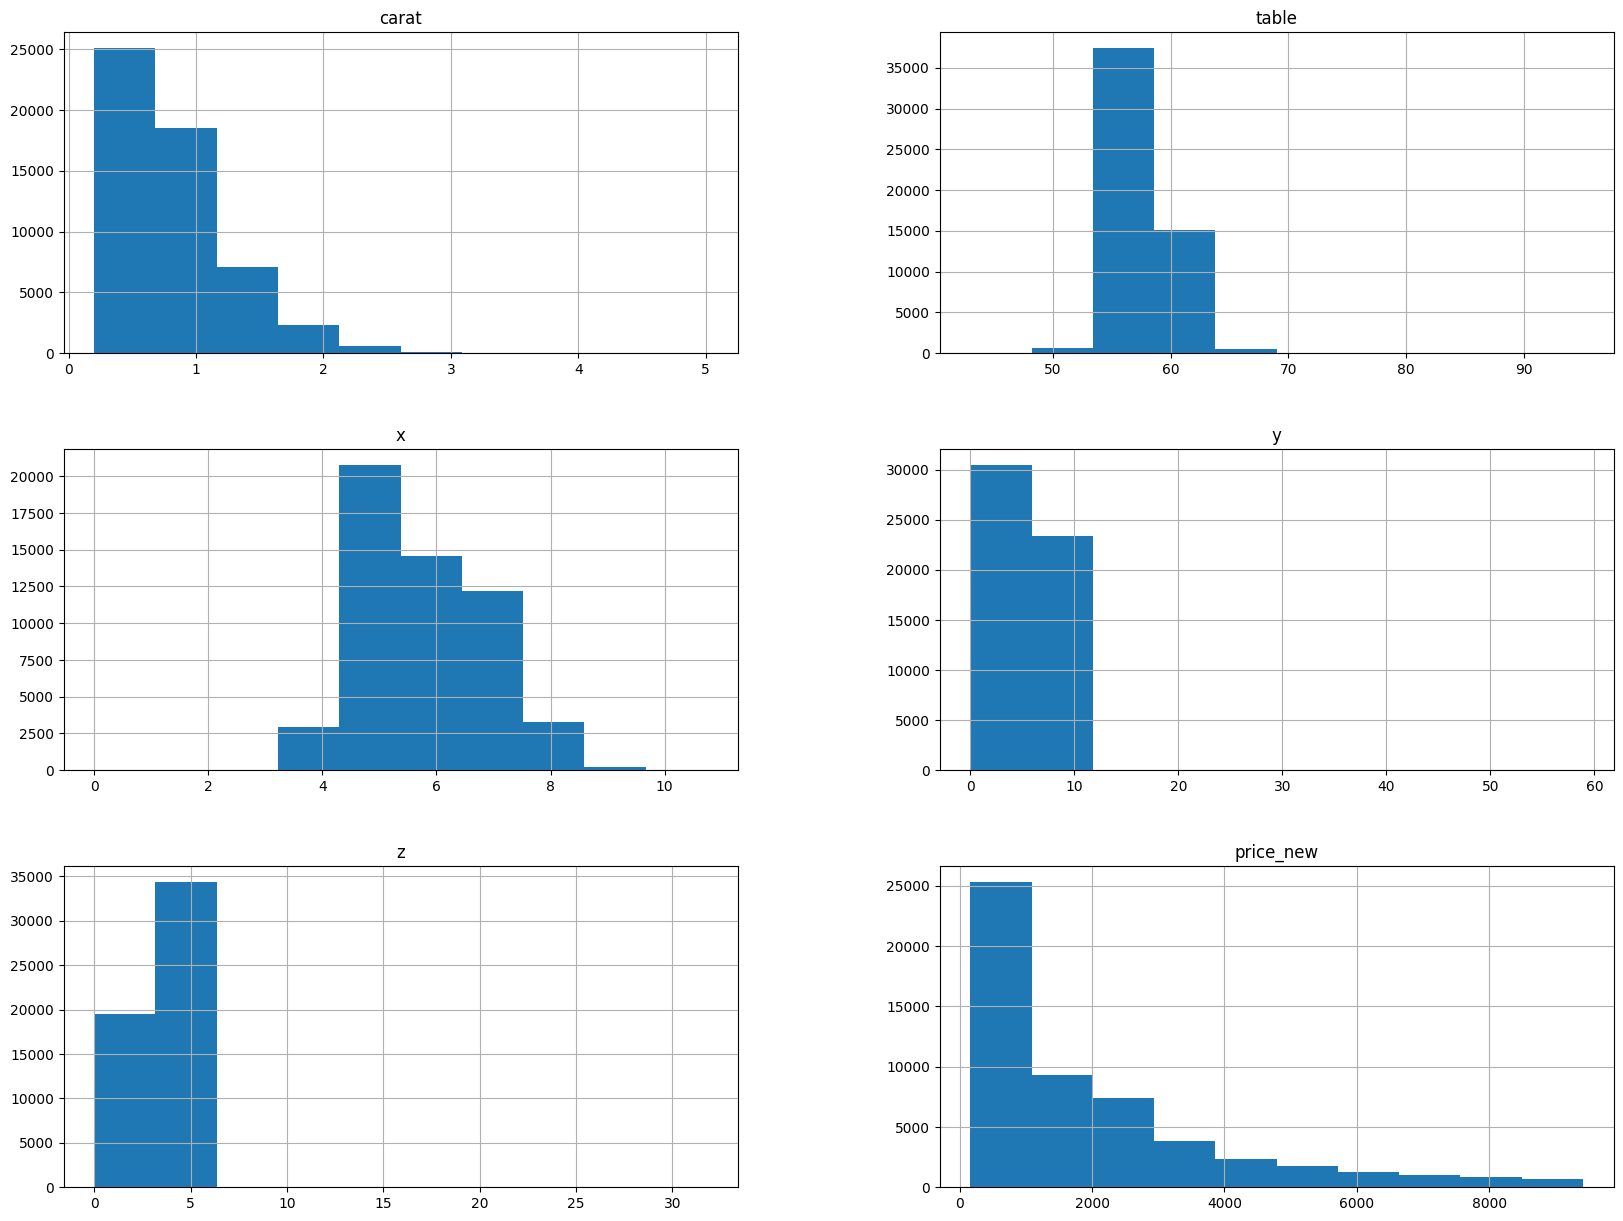

In [11]:
freqgraph = data.select_dtypes(include = 'float64')
freqgraph.hist(figsize = (20, 15))

Fill the missing values

In [12]:
data['table'] = data['table'].fillna(data['table'].mean())
data['carat'] = data['carat'].fillna(data['carat'].median())
data['color'] = data['color'].fillna(data['color'].mode()[0])

In [13]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

Find the outliers

In [14]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [16]:
num_columns = ['carat', 'table', 'x', 'y', 'z']

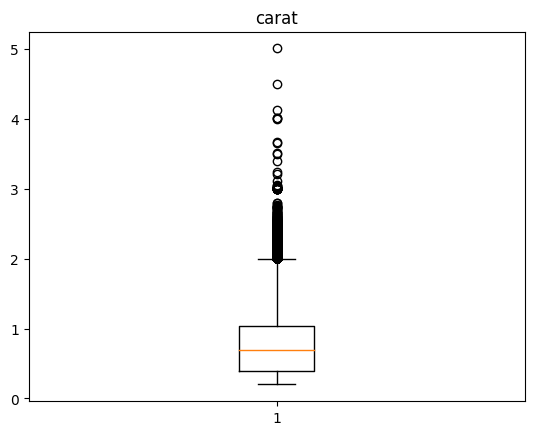

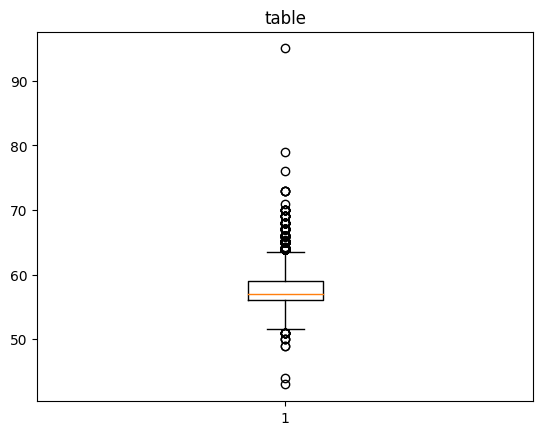

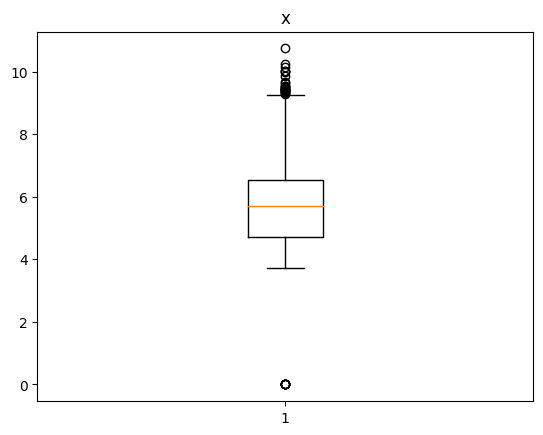

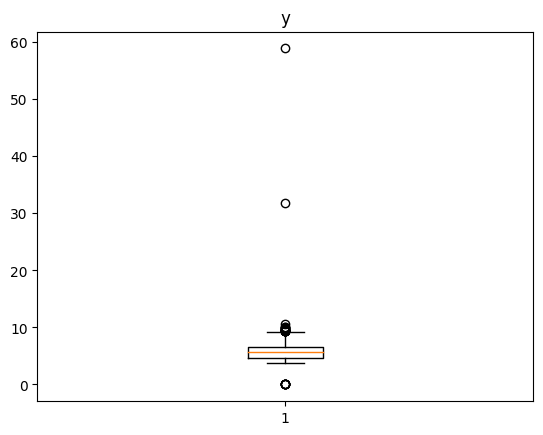

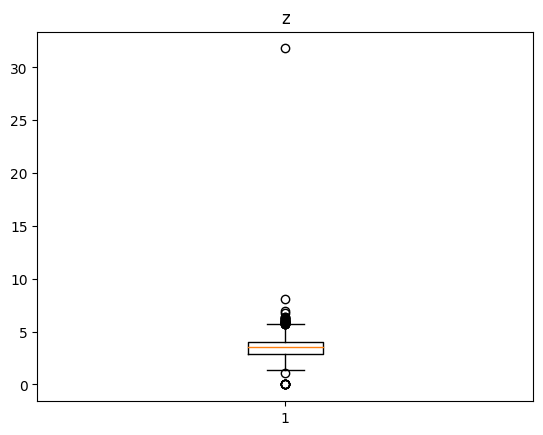

In [18]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

Carat Column

In [19]:
Q1 =np.percentile(data['carat'], 25, method = 'midpoint')
Q2 =np.percentile(data['carat'], 50, method = 'midpoint')
Q3 =np.percentile(data['carat'], 75, method = 'midpoint')

print("Q1 is:", Q1)
print("Q2 is:", Q2)
print("Q3 is:", Q3)

Q1 is: 0.4
Q2 is: 0.7
Q3 is: 1.04


In [20]:
IQR = Q3 - Q1
print(IQR)

0.64


In [21]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print('lower whisker:', low_lim)
print('uppwe whisker:', up_lim)

lower whisker: -0.5599999999999999
uppwe whisker: 2.0


In [23]:
outlier = []
for x in data['carat']:
  if ((x < low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[2.06, 2.14, 2.15, 2.22, 2.01, 2.01, 2.27, 2.03, 2.03, 2.06, 2.08, 2.49, 2.01, 2.14, 2.02, 2.02, 2.15, 2.03, 2.03, 2.07, 3.0, 2.21, 2.22, 2.01, 2.1, 2.1, 2.25, 2.01, 2.03, 2.17, 2.32, 2.72, 2.23, 2.11, 2.01, 2.05, 2.25, 2.27, 2.3, 2.31, 2.01, 2.04, 2.03, 2.12, 2.11, 2.5, 2.2, 2.01, 3.01, 3.0, 2.01, 2.01, 2.33, 2.04, 2.04, 2.68, 2.25, 2.5, 2.34, 2.02, 2.16, 2.5, 2.01, 2.74, 2.01, 2.16, 2.28, 2.25, 2.17, 2.02, 2.03, 2.04, 2.03, 2.01, 2.01, 2.01, 2.68, 2.43, 2.01, 2.04, 2.02, 2.01, 2.06, 2.01, 2.04, 3.11, 2.05, 2.05, 2.05, 2.02, 2.02, 2.04, 3.01, 2.06, 2.01, 2.09, 2.52, 2.19, 2.02, 2.09, 2.01, 2.01, 2.01, 2.01, 2.01, 2.04, 2.14, 2.18, 2.01, 2.01, 2.01, 2.02, 2.77, 2.63, 3.05, 2.1, 2.46, 2.01, 2.01, 2.02, 3.02, 2.63, 2.22, 2.02, 2.01, 2.01, 2.38, 2.06, 3.01, 2.01, 2.01, 2.01, 2.02, 3.0, 2.03, 2.01, 2.01, 2.24, 2.32, 2.01, 2.06, 2.3, 2.02, 2.2, 2.07, 2.01, 2.25, 2.01, 2.25, 2.01, 2.34, 2.02, 2.09, 2.2, 2.01, 2.02, 2.03, 2.01, 2.06, 2.04, 2.01, 2.34, 2.26, 2.06, 2.36, 2.04, 2.01, 2.01, 2.08,

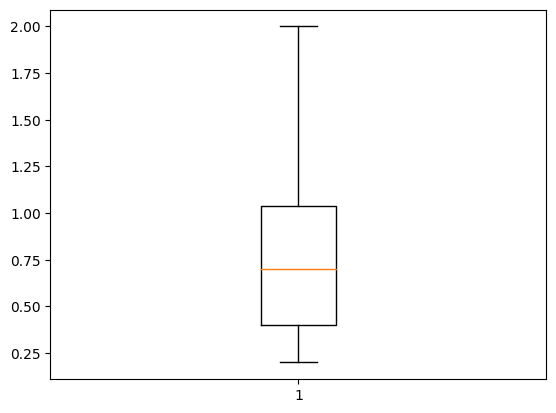

In [25]:
data['carat'] = data['carat'].clip(lower = low_lim, upper = up_lim)
plt.boxplot(data['carat'])
plt.show();

Table Column

In [26]:
Q1 =np.percentile(data['table'], 25, method = 'midpoint')
Q2 =np.percentile(data['table'], 50, method = 'midpoint')
Q3 =np.percentile(data['table'], 75, method = 'midpoint')

print("Q1 is:", Q1)
print("Q2 is:", Q2)
print("Q3 is:", Q3)

Q1 is: 56.0
Q2 is: 57.0
Q3 is: 59.0


In [27]:
IQR = Q3 - Q1
print(IQR)

3.0


In [28]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print('lower whisker:', low_lim)
print('uppwe whisker:', up_lim)

lower whisker: 51.5
uppwe whisker: 63.5


In [29]:
outlier = []
for x in data['carat']:
  if ((x < low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.3, 0.23, 0.22, 0.31, 0.2, 0.32, 0.3, 0.3, 0.3, 0.3, 0.3, 0.23, 0.23, 0.31, 0.31, 0.23, 0.24, 0.3, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.31, 0.26, 0.33, 0.33, 0.33, 0.26, 0.26, 0.32, 0.29, 0.32, 0.32, 0.25, 0.29, 0.24, 0.23, 0.32, 0.22, 0.22, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.3, 0.3, 0.3, 0.42, 0.28, 0.32, 0.31, 0.31, 0.24, 0.24, 0.3, 0.3, 0.3, 0.3, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.26, 0.38, 0.26, 0.24, 0.24, 0.24, 0.24, 0.32, 0.7, 0.86, 0.7, 0.71, 0.78, 0.7, 0.7, 0.96, 0.73, 0.8, 0.75, 0.75, 0.74, 0.75, 0.8, 0.75, 0.8, 0.74, 0.81, 0.59, 0.8, 0.74, 0.9, 0.74, 0.73, 0.73, 0.8, 0.71, 0.7, 0.8, 0.71, 0.74, 0.7, 0.7, 0.7, 0.7, 0.91, 0.61, 0.91, 0.91, 0.77, 0.71, 0.71, 0.7, 0.77, 0.63, 0.71, 0.71, 0.76, 0.64, 0.71, 0.71, 0.7, 0.7, 0.71, 0.7, 0.71, 0.73, 0.7, 0.7, 0.71, 0.74, 0.71, 0.73, 0.76, 0.76, 0.71, 0.73, 0.73, 0.73, 0.73, 0.72, 0.73, 0.71, 0.79, 0.73, 0.8, 0.58, 0.58, 0.71, 0.75, 0.7, 1.17, 0.6, 

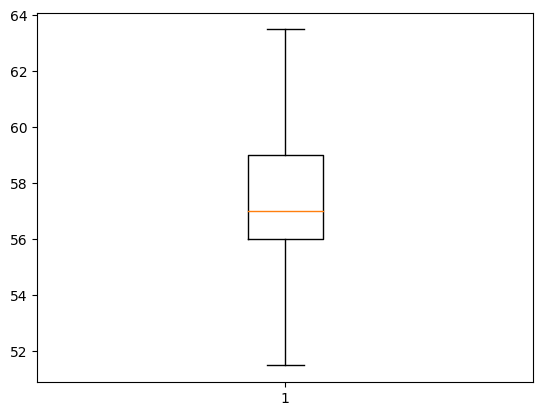

In [30]:
data['table'] = data['table'].clip(lower = low_lim, upper = up_lim)
plt.boxplot(data['table'])
plt.show();

x column

In [36]:
from scipy.stats import zscore
z_score = zscore(data['x'])
z_score

0       -1.587837
1       -1.641325
2       -1.498691
3       -1.364971
4       -1.240167
           ...   
53935    0.016798
53936   -0.036690
53937   -0.063434
53938    0.373383
53939    0.088115
Name: x, Length: 53940, dtype: float64

In [38]:
threshold =  3
outliers_index = data.index[(z_score > threshold) | (z_score < -threshold)]
print(outliers_index)

Int64Index([11963, 15951, 22428, 22741, 22831, 23644, 24067, 24131, 24297,
            24328, 24520, 24816, 25460, 25850, 25998, 25999, 26243, 26431,
            26444, 26467, 26534, 27130, 27415, 27429, 27514, 27630, 27638,
            27649, 27679, 27684, 27685, 49189, 49556, 49557],
           dtype='int64')


In [33]:
data1 = data.drop(outliers_index)
data1

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,63.5,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [34]:
data1.shape

(53897, 9)

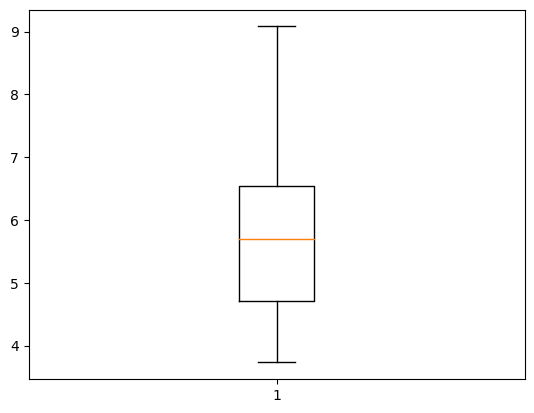

In [35]:
plt.boxplot(data1['x'])
plt.show();

y column

In [37]:
from scipy.stats import zscore
z_score = zscore(data['y'])
z_score

0       -1.536196
1       -1.658774
2       -1.457395
3       -1.317305
4       -1.212238
           ...   
53935    0.022304
53936    0.013548
53937   -0.047741
53938    0.337506
53939    0.118616
Name: y, Length: 53940, dtype: float64

In [39]:
threshold =  3
outliers_index = data.index[(z_score > threshold) | (z_score < -threshold)]
print(outliers_index)

Int64Index([11963, 15951, 22428, 22741, 22831, 23644, 24067, 24131, 24297,
            24328, 24520, 24816, 25460, 25850, 25998, 25999, 26243, 26431,
            26444, 26467, 26534, 27130, 27415, 27429, 27514, 27630, 27638,
            27649, 27679, 27684, 27685, 49189, 49556, 49557],
           dtype='int64')


In [40]:
data2 = data.drop(outliers_index)
data2

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,63.5,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


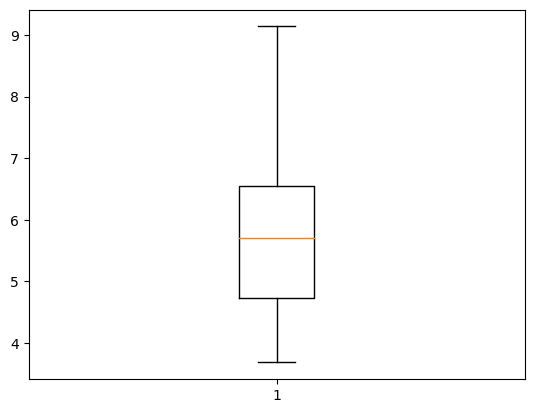

In [41]:
plt.boxplot(data2['y'])
plt.show();

z column

In [42]:
from scipy.stats import zscore
z_score = zscore(data['z'])
z_score

0       -1.576493
1       -1.746981
2       -1.746981
3       -1.292347
4       -1.121859
           ...   
53935   -0.056310
53936    0.099970
53937    0.028934
53938    0.284665
53939    0.142592
Name: z, Length: 53940, dtype: float64

In [43]:
threshold =  3
outliers_index = data.index[(z_score > threshold) | (z_score < -threshold)]
print(outliers_index)

Int64Index([11182, 11963, 14635, 15951, 16283, 17196, 19339, 19346, 21654,
            21758, 21862, 22428, 22540, 23539, 23644, 24067, 24131, 24297,
            24328, 24520, 25998, 25999, 26100, 26194, 26243, 26431, 26444,
            26467, 26534, 26744, 26933, 27130, 27415, 27429, 27515, 27516,
            27517, 27518, 27630, 27679, 48410, 49556, 49557],
           dtype='int64')


In [44]:
data3 = data.drop(outliers_index)
data3

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,63.5,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


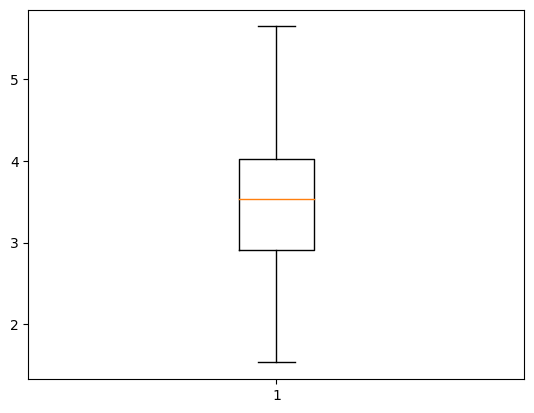

In [45]:
plt.boxplot(data3['z'])
plt.show();

Correlation

In [46]:
data.corr()

<ipython-input-46-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,table,x,y,z,price_new
carat,1.000000,0.187477,0.980450,0.957223,0.963120,0.922484
table,0.187477,1.000000,0.198111,0.186787,0.154964,0.130313
x,0.980450,0.198111,1.000000,0.974701,0.975223,0.884435
y,0.957223,0.186787,0.974701,1.000000,0.956305,0.865421
z,0.963120,0.154964,0.975223,0.956305,1.000000,0.865153
price_new,0.922484,0.130313,0.884435,0.865421,0.865153,1.000000


<ipython-input-47-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


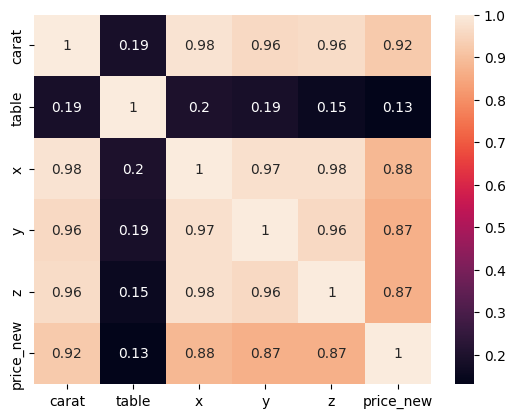

In [47]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Encoding - Label Encoding

Find the unique for cut, color and clariity

In [48]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [49]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [50]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Label Encoding for Color

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['color'] = le.fit_transform(data['color'])
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,1,VS1,63.5,4.05,4.07,2.31,163.5
3,0.29,Premium,5,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,SI2,58.0,4.34,4.35,2.75,167.5


Label Encoding for Clarity

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['clarity'] = le.fit_transform(data['clarity'])
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,1,2,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,1,4,63.5,4.05,4.07,2.31,163.5
3,0.29,Premium,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,6,3,58.0,4.34,4.35,2.75,167.5


One hot encoding for Cut

In [53]:
data = pd.get_dummies(data)
data.head()

,carat,color,clarity,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,1,3,55.0,3.95,3.98,2.43,163.0,0,0,1,0,0
1,0.21,1,2,61.0,3.89,3.84,2.31,163.0,0,0,0,1,0
2,0.23,1,4,63.5,4.05,4.07,2.31,163.5,0,1,0,0,0
3,0.29,5,5,58.0,4.20,4.23,2.63,167.0,0,0,0,1,0
4,0.31,6,3,58.0,4.34,4.35,2.75,167.5,0,1,0,0,0


Scaling

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   color          53940 non-null  int64  
 2   clarity        53940 non-null  int64  
 3   table          53940 non-null  float64
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   price_new      53940 non-null  float64
 8   cut_Fair       53940 non-null  uint8  
 9   cut_Good       53940 non-null  uint8  
 10  cut_Ideal      53940 non-null  uint8  
 11  cut_Premium    53940 non-null  uint8  
 12  cut_Very Good  53940 non-null  uint8  
dtypes: float64(6), int64(2), uint8(5)
memory usage: 3.5 MB


In [56]:
X_data = data.drop(['color','clarity','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good'], axis=1)
X_data

,carat,table,x,y,z,price_new
0,0.23,55.0,3.95,3.98,2.43,163.0
1,0.21,61.0,3.89,3.84,2.31,163.0
2,0.23,63.5,4.05,4.07,2.31,163.5
3,0.29,58.0,4.20,4.23,2.63,167.0
4,0.31,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50,1378.5
53936,0.72,55.0,5.69,5.75,3.61,1378.5
53937,0.70,60.0,5.66,5.68,3.56,1378.5
53938,0.86,58.0,6.15,6.12,3.74,1378.5


In [57]:
X_data.describe()

,carat,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,57.439096,5.731157,5.734526,3.539635,1966.399861
std,0.457089,2.161087,1.121761,1.142135,0.703869,1994.719869
min,0.200000,51.500000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,2.000000,63.500000,10.740000,58.900000,31.800000,9411.500000


Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X_data)
X_sc = pd.DataFrame(X_sc)
X_sc

,0,1,2,3,4,5
0,-1.230752,-1.128653,-1.587837,-1.536196,-1.576493,-0.904095
1,-1.274508,1.647752,-1.641325,-1.658774,-1.746981,-0.904095
2,-1.230752,2.804588,-1.498691,-1.457395,-1.746981,-0.903844
3,-1.099486,0.259550,-1.364971,-1.317305,-1.292347,-0.902090
4,-1.055730,0.259550,-1.240167,-1.212238,-1.121859,-0.901839
...,...,...,...,...,...,...
53935,-0.158740,-0.203185,0.016798,0.022304,-0.056310,-0.294731
53936,-0.158740,-1.128653,-0.036690,0.013548,0.099970,-0.294731
53937,-0.202496,1.185018,-0.063434,-0.047741,0.028934,-0.294731
53938,0.147549,0.259550,0.373383,0.337506,0.284665,-0.294731


In [59]:
X_sc.describe()

,0,1,2,3,4,5
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.854735e-16,1.181340e-15,2.782103e-16,-8.430615e-17,-1.264592e-17,-9.273676e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.296386e+00,-2.748223e+00,-5.109120e+00,-5.020931e+00,-5.028871e+00,-9.040952e-01
25%,-8.588299e-01,-6.659191e-01,-9.103248e-01,-8.882800e-01,-8.945421e-01,-7.476808e-01
50%,-2.024958e-01,-2.031848e-01,-2.777553e-02,-2.147398e-02,-1.368844e-02,-3.839672e-01
75%,5.413494e-01,7.222838e-01,7.210542e-01,7.052421e-01,7.108847e-01,3.487866e-01
max,2.641618e+00,2.804588e+00,4.465203e+00,4.654965e+01,4.015040e+01,3.732438e+00


MinMax Scaling

In [60]:
import sklearn
minmax = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))
X_mm = minmax.fit_transform(X_data)
X_mm = pd.DataFrame(X_mm)
X_mm

,0,1,2,3,4,5
0,0.016667,0.291667,0.367784,0.067572,0.076415,0.000000
1,0.005556,0.791667,0.362197,0.065195,0.072642,0.000000
2,0.016667,1.000000,0.377095,0.069100,0.072642,0.000054
3,0.050000,0.541667,0.391061,0.071817,0.082704,0.000433
4,0.061111,0.541667,0.404097,0.073854,0.086478,0.000487
...,...,...,...,...,...,...
53935,0.288889,0.458333,0.535382,0.097793,0.110063,0.131427
53936,0.288889,0.291667,0.529795,0.097623,0.113522,0.131427
53937,0.277778,0.708333,0.527002,0.096435,0.111950,0.131427
53938,0.366667,0.541667,0.572626,0.103905,0.117610,0.131427


In [61]:
X_mm.describe()

,0,1,2,3,4,5
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.329199,0.494925,0.533627,0.097360,0.111309,0.194994
std,0.253938,0.180091,0.104447,0.019391,0.022134,0.215680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.375000,0.438547,0.080136,0.091509,0.033735
50%,0.277778,0.458333,0.530726,0.096944,0.111006,0.112180
75%,0.466667,0.625000,0.608939,0.111036,0.127044,0.270219
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plot of Standard Scaling

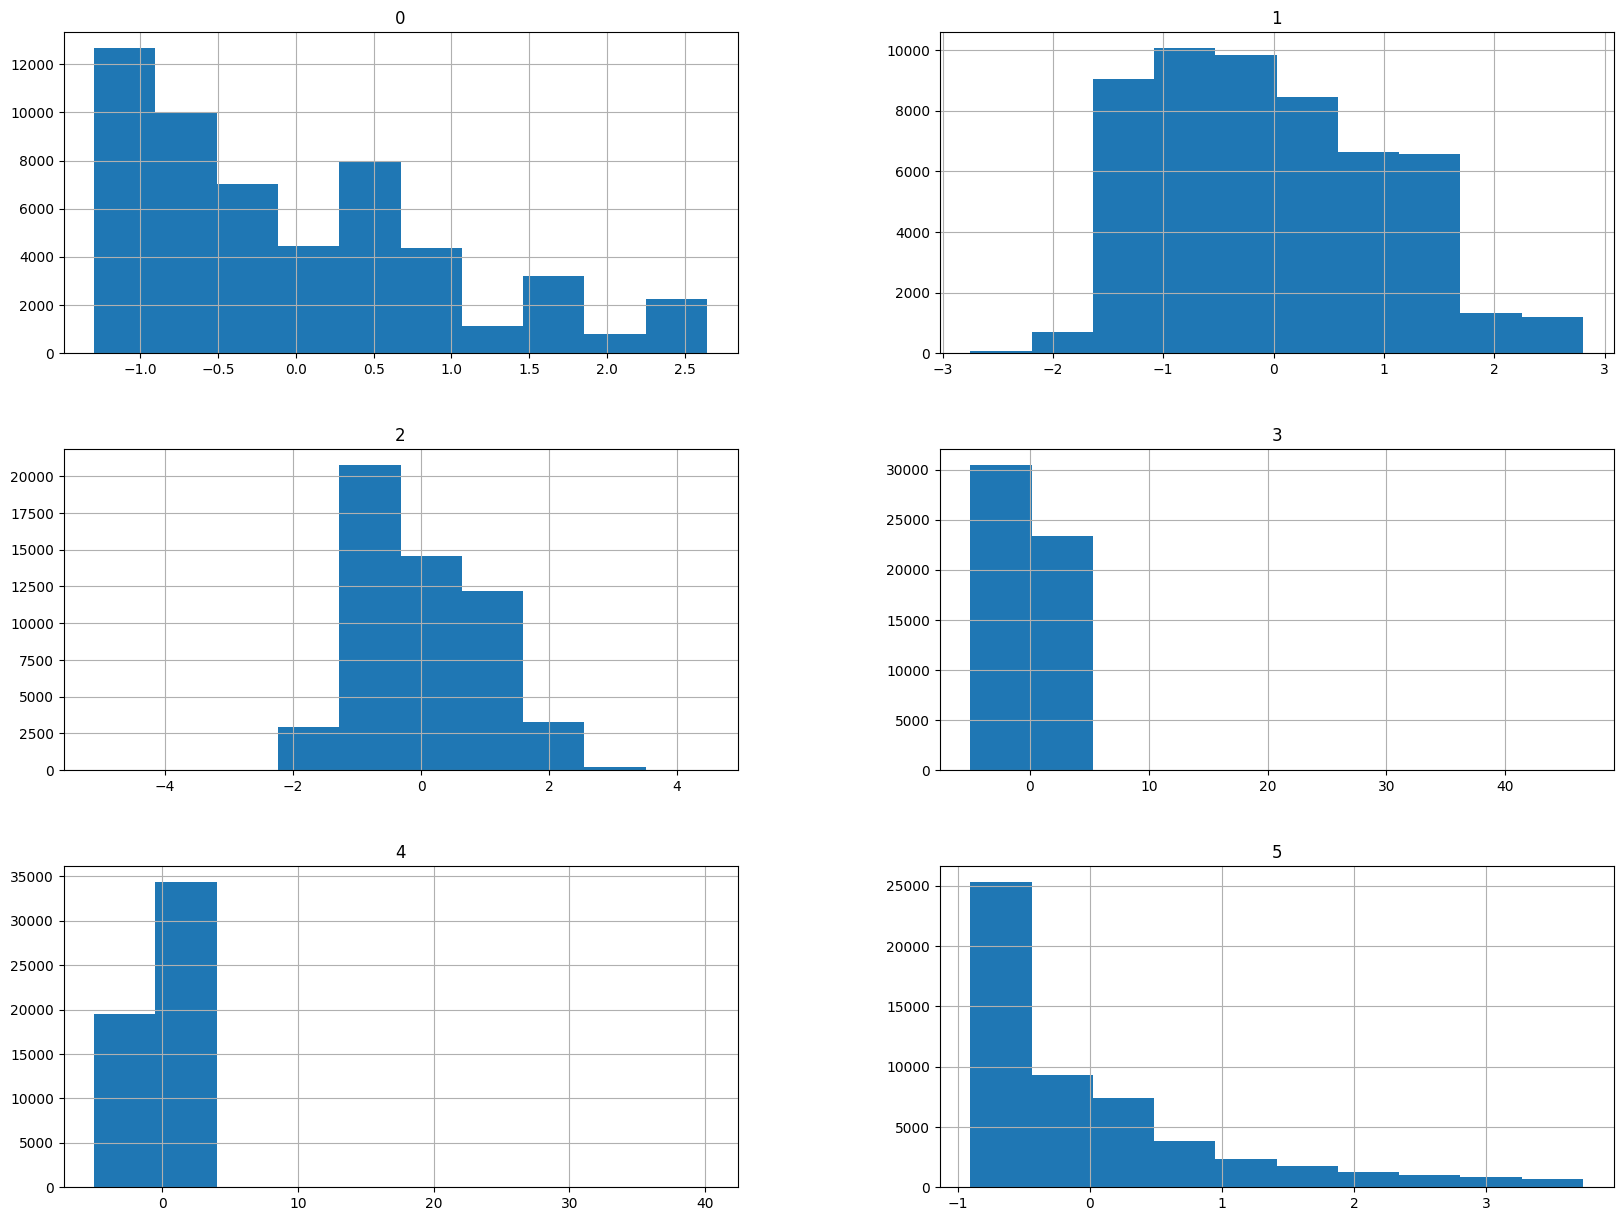

In [62]:
X_sc.hist(figsize=(20,15))
plt.show()

Plot of MinMax Scaling

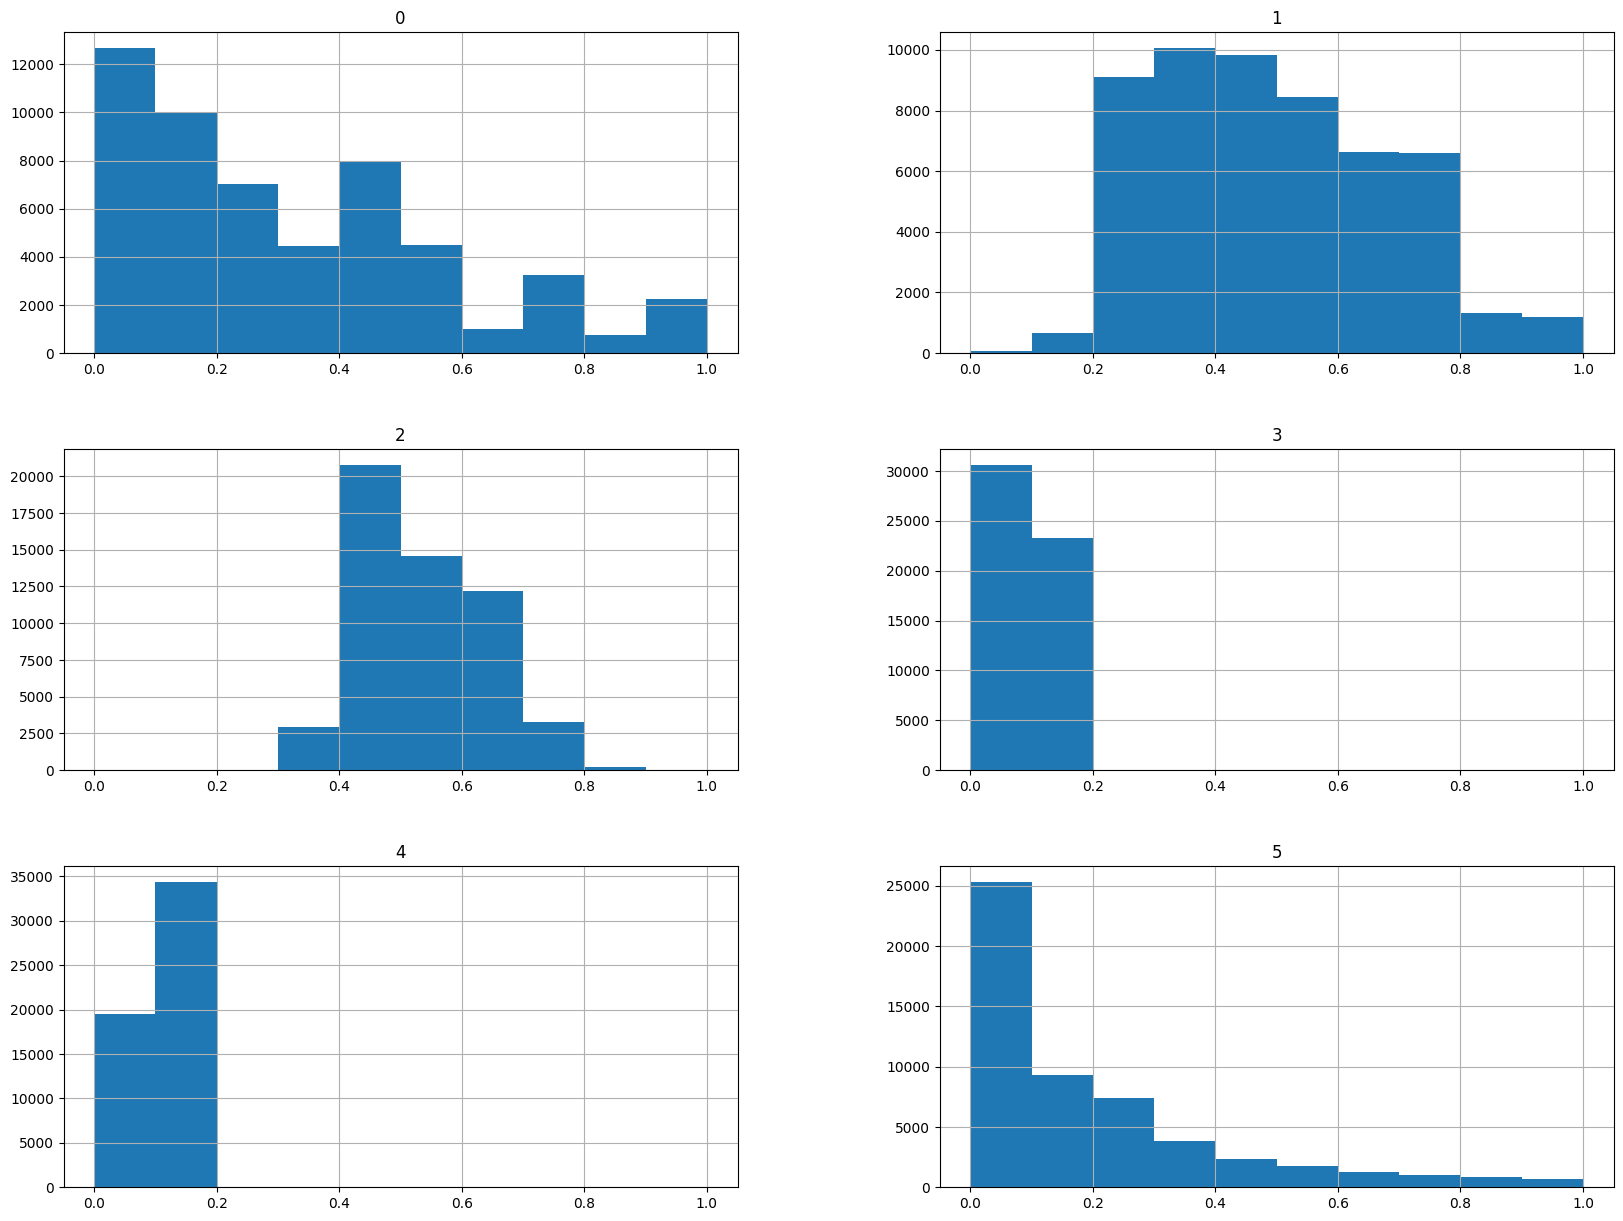

In [63]:
X_mm.hist(figsize=(20,15))
plt.show()

Normalization

In [64]:
X_norm = sklearn.preprocessing.normalize(X_data)
X_norm = pd.DataFrame(X_norm)
X_norm

,0,1,2,3,4,5
0,0.001336,0.319512,0.022947,0.023121,0.014117,0.946916
1,0.001206,0.350290,0.022338,0.022051,0.013265,0.936020
2,0.001310,0.361808,0.023076,0.023190,0.013162,0.931585
3,0.001639,0.327859,0.023741,0.023911,0.014867,0.944007
4,0.001748,0.326971,0.024466,0.024523,0.015503,0.944270
...,...,...,...,...,...,...
53935,0.000522,0.041313,0.004168,0.004175,0.002537,0.999125
53936,0.000522,0.039866,0.004124,0.004168,0.002617,0.999184
53937,0.000507,0.043484,0.004102,0.004116,0.002580,0.999034
53938,0.000623,0.042037,0.004457,0.004436,0.002711,0.999092


In [65]:
X_norm.describe()

,0,1,2,3,4,5
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.000618,0.074092,0.006332,0.006344,0.003914,0.994985
std,0.000281,0.065622,0.004750,0.004774,0.002945,0.007694
min,0.000112,0.005640,0.000000,0.000000,0.000000,0.931585
25%,0.000404,0.021644,0.002474,0.002473,0.001527,0.992815
50%,0.000571,0.047564,0.004703,0.004705,0.002905,0.998841
75%,0.000803,0.118664,0.009678,0.009661,0.005968,0.999758
max,0.001840,0.361808,0.024466,0.030593,0.032217,0.999983


Plot of Normalization

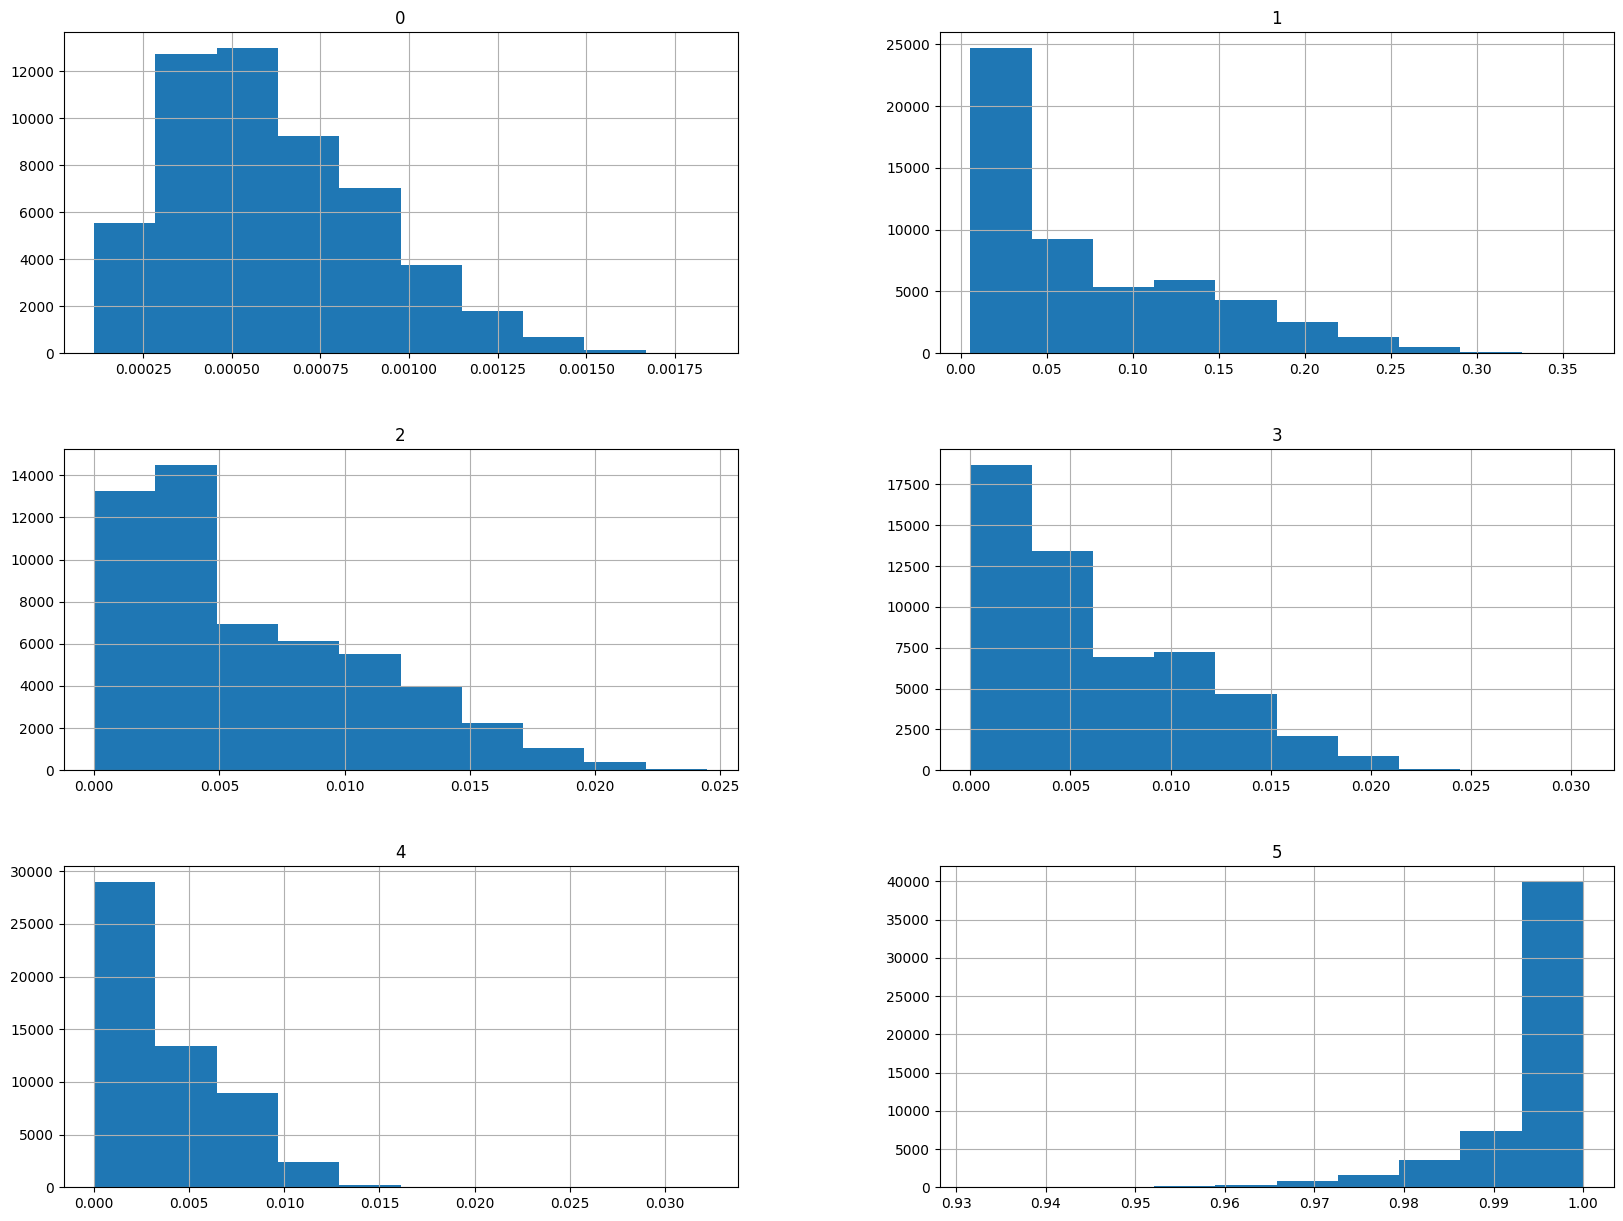

In [66]:
X_norm.hist(figsize=(20,15))
plt.show()